In [200]:
from csgo.parser import DemoParser
import numpy
import csv
import pandas
import pyserialem
import os
from tabulate import tabulate
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib.colors as colors
%matplotlib inline
import imageio
import matplotlib

In [48]:
def getDemoPaths(dir_path):
    demoPaths = []
    x = 0
    for filename in os.listdir(dir_path):
        demoPaths.append(os.path.join(dir_path, filename))
    return demoPaths

In [49]:
def generateDemoParsers(paths):
    demo_parsers = []
    for x in paths:
        demoParser = DemoParser(demofile=x, demo_id = x.split('/')[-1].split('.')[0].split('_')[0], parse_rate=128)
        demo_parsers.append(demoParser)
    print("# Demo Parsers: " + str(len(demo_parsers)))
    return demo_parsers

In [50]:
def generateData(parsers):
    mapData, killData, nadeData, flashData, roundData, damageData = [], [], [], [], [], []
    for x in parsers:
        x.parse()
        mapData.append(x.parse(return_type="df"))
        killData.append(x._parse_kills(return_type="df"))
        nadeData.append(x._parse_grenades(return_type="df"))
        flashData.append(x._parse_flashes(return_type="df"))
        roundData.append(x._parse_rounds(return_type="df"))
        damageData.append(x._parse_damages(return_type="df"))
    return (mapData, killData, nadeData, flashData, roundData, damageData)

In [51]:
def concat_data(aggregate_data):
    final_df = None
    for x in aggregate_data:
        final_df = pandas.concat([final_df, x], ignore_index=True)
    return final_df

In [52]:
dir_path = "./demos/Dreamhack"

In [241]:
bigPath = "./demos/mirage/Big/Mirage"
vpPath = "./demos/mirage/VP/Mirage"
natusPath = "./demos/mirage/Natus/Mirage"
heroicPath = "./demos/mirage/Heroic/Mirage"
mirageMappingPath = './mappings/mappings/'

In [242]:
liquidPath = "./demos/mirage/Liquid/Mirage"
furiaPath = "./demos/mirage/Furia/Mirage"
complexityPath = "./demos/mirage/Complexity/Mirage"
g2Path = "./demos/mirage/G2/Mirage"

In [53]:
mirageMappingPath = './mappings/mappings/'
mappingFile = os.path.join(mirageMappingPath, os.listdir(mirageMappingPath)[0])

In [66]:
mapsPaths = './heatmapimages/map_assets'

In [55]:
file = open(mappingFile, 'r')
lines = file.readlines()
file.close()

In [56]:
for x in range(len(lines)):
    if(lines[x][-1] == '\n'):
        lines[x] = lines[x][:-1]

In [57]:
mappedPlaceNames = {}
for x in lines:
    if(x != ''):
            mappedPlaceNames[x.split(':')[0]] = x.split(':')[1]

In [58]:
demoPaths = getDemoPaths(dir_path)

In [59]:
demoParsers = generateDemoParsers(demoPaths)

13:54:24 [INFO] Go version>=1.14.0
13:54:24 [INFO] Initialized CSGODemoParser with demofile /home/nk095x/cs_demos/csgo/demos/Dreamhack/gambit-vs-fiend-dust2.dem
13:54:24 [INFO] Setting demo id to gambit-vs-fiend-dust2
13:54:24 [INFO] Setting parse rate to 128
13:54:24 [INFO] Go version>=1.14.0
13:54:24 [INFO] Initialized CSGODemoParser with demofile /home/nk095x/cs_demos/csgo/demos/Dreamhack/natus-vincere-vs-mousesports-overpass.dem
13:54:24 [INFO] Setting demo id to natus-vincere-vs-mousesports-overpass
13:54:24 [INFO] Setting parse rate to 128
13:54:24 [INFO] Go version>=1.14.0
13:54:24 [INFO] Initialized CSGODemoParser with demofile /home/nk095x/cs_demos/csgo/demos/Dreamhack/spirit-vs-g2-mirage.dem
13:54:24 [INFO] Setting demo id to spirit-vs-g2-mirage
13:54:24 [INFO] Setting parse rate to 128


# Demo Parsers: 3


In [60]:
maps, kills, nades, flashs, rounds, damages = generateData(demoParsers)

13:54:24 [INFO] Running Golang parser from /home/nk095x/cs_demos/csgo/csgo/parser/
13:54:24 [INFO] Looking for file at /home/nk095x/cs_demos/csgo/demos/Dreamhack/gambit-vs-fiend-dust2.dem
13:54:37 [INFO] Wrote demo parse output to gambit-vs-fiend-dust2.json
13:54:37 [INFO] Reading in JSON from gambit-vs-fiend-dust2.json
13:54:38 [INFO] JSON data loaded, available in the `json` attribute to parser
13:54:38 [INFO] Successfully parsed JSON output
13:54:38 [INFO] Successfully returned JSON output
13:54:38 [INFO] Running Golang parser from /home/nk095x/cs_demos/csgo/csgo/parser/
13:54:38 [INFO] Looking for file at /home/nk095x/cs_demos/csgo/demos/Dreamhack/gambit-vs-fiend-dust2.dem
13:54:52 [INFO] Wrote demo parse output to gambit-vs-fiend-dust2.json
13:54:52 [INFO] Reading in JSON from gambit-vs-fiend-dust2.json
13:54:52 [INFO] JSON data loaded, available in the `json` attribute to parser
13:54:52 [INFO] Successfully parsed JSON output
13:54:52 [INFO] Successfully returned JSON output
13:5

In [61]:
killData = concat_data(kills)
nadeData = concat_data(nades)
flashData = concat_data(flashs)
roundData = concat_data(rounds)
damageData = concat_data(damages)

In [62]:
killData.groupby(['MatchId']).MapName.value_counts()

MatchId                                MapName    
gambit-vs-fiend-dust2                  de_dust2       130
natus-vincere-vs-mousesports-overpass  de_overpass    187
spirit-vs-g2-mirage                    de_mirage      237
Name: MapName, dtype: int64

In [63]:
killData[killData['MatchId'] == 'spirit-vs-g2-mirage']

,Tick,Second,AttackerSteamId,AttackerName,AttackerTeam,AttackerSide,AttackerX,AttackerY,AttackerZ,AttackerAreaId,...,IsHeadshot,IsTrade,PlayerTradedName,PlayerTradedTeam,PlayerTradedSteamId,IsFirstKill,Weapon,RoundNum,MatchId,MapName
317,6199,19.445312,7.656120e+16,sdy,Team Spirit,CT,100.865425,-818.648743,-167.968750,1606.0,...,True,False,None,None,NaN,True,USP-S,1,spirit-vs-g2-mirage,de_mirage
318,6322,20.406250,7.656120e+16,sdy,Team Spirit,CT,64.669182,-815.096741,-167.968750,429.0,...,True,False,JACKZ,G2 Esports,7.656120e+16,False,USP-S,1,spirit-vs-g2-mirage,de_mirage
319,8740,39.296875,7.656120e+16,chopper,Team Spirit,CT,-778.508789,-1382.557373,-167.968750,6.0,...,True,False,AmaNEk,G2 Esports,7.656120e+16,False,USP-S,1,spirit-vs-g2-mirage,de_mirage
320,12583,69.320312,7.656120e+16,mir,Team Spirit,CT,-768.627441,-1396.179199,-167.968750,6.0,...,True,False,NiKo,G2 Esports,7.656120e+16,False,USP-S,1,spirit-vs-g2-mirage,de_mirage
321,13994,80.343750,7.656120e+16,mir,Team Spirit,CT,-192.428375,-1977.795776,-167.968750,144.0,...,True,False,nexa,G2 Esports,7.656120e+16,False,USP-S,1,spirit-vs-g2-mirage,de_mirage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,640579,106.984375,7.656120e+16,AmaNEk,G2 Esports,T,-1120.006348,-967.659241,-167.968750,1084.0,...,True,False,mir,Team Spirit,7.656120e+16,False,AK-47,35,spirit-vs-g2-mirage,de_mirage
550,640896,109.460938,7.656120e+16,degster,Team Spirit,CT,-1178.629517,-2478.789062,-170.974701,1242.0,...,False,False,magixx,Team Spirit,7.656120e+16,False,AWP,35,spirit-vs-g2-mirage,de_mirage
551,641108,111.117188,7.656120e+16,degster,Team Spirit,CT,-1138.083984,-2455.281006,-167.968750,1264.0,...,False,False,JACKZ,G2 Esports,7.656120e+16,False,AWP,35,spirit-vs-g2-mirage,de_mirage
552,641389,113.312500,7.656120e+16,AmaNEk,G2 Esports,T,-1120.031250,-456.646667,-167.968750,284.0,...,True,False,huNter-,G2 Esports,7.656120e+16,False,AK-47,35,spirit-vs-g2-mirage,de_mirage


In [132]:
temp = "de_mirage"
bg = Image.open(mapsPaths + "/" + temp + ".png")

In [155]:
temp3 = killData[killData['MatchId'] == 'spirit-vs-g2-mirage']
mapBounds =  {"de_mirage" : {"EndX" : 1912, "EndY" : 1682, "ResX" : 1024, "ResY" : 1024, "StartX" : -3217, "StartY" : -3401},
             "de_dust2" : {"EndX" : 2127, "EndY" : 3455, "ResX" : 1024, "ResY" : 1024, "StartX" : -2486, "StartY" : -1150},
             "de_inferno" : {"EndX" : 2797, "EndY" : 3800, "ResX" : 1024, "ResY" : 1024, "StartX" : -1960, "StartY" : -1062},
             "de_train" : {"EndX" : 2262, "EndY" : 2447, "ResX" : 1024, "ResY" : 1024, "StartX" : -2436, "StartY" : -2469},
             "de_overpass" : {"EndX" : 503, "EndY" : 1740, "ResX" : 1024, "ResY" : 1024, "StartX" : -4820, "StartY" : -3591}}

In [156]:
mapBounds[temp3.MapName.iloc[0]]['ResX']

1024

In [157]:
type(mapBounds[temp3.MapName.iloc[0]]['ResX'])

int

In [227]:
temp3.AttackerName.value_counts()

degster    43
huNter-    30
sdy        27
NiKo       24
AmaNEk     22
nexa       21
mir        19
chopper    19
JACKZ      18
magixx     14
Name: AttackerName, dtype: int64

In [159]:
temp3['NewAttackerX'] = ( mapBounds[temp3.MapName.iloc[0]]['ResX'] * (temp3['AttackerViewX'] - 
                mapBounds[temp3.MapName.iloc[0]]['StartX'])) / ( mapBounds[temp3.MapName.iloc[0]]['EndX'] -  mapBounds[temp3.MapName.iloc[0]]['StartX'])

/home/nk095x/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
temp3['NewAttackerY'] = ( mapBounds[temp3.MapName.iloc[0]]['ResY'] * (temp3['AttackerViewY'] - 
                mapBounds[temp3.MapName.iloc[0]]['StartY'])) / ( mapBounds[temp3.MapName.iloc[0]]['EndY'] -  mapBounds[temp3.MapName.iloc[0]]['StartY'])

/home/nk095x/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [161]:
temp3.NewAttackerX.describe()

count    237.000000
mean     679.003435
std       20.667080
min      643.175790
25%      661.830742
50%      678.148616
75%      696.279343
max      713.427422
Name: NewAttackerX, dtype: float64

In [162]:
temp3.AttackerX

317     100.865425
318      64.669182
319    -778.508789
320    -768.627441
321    -192.428375
          ...     
549   -1120.006348
550   -1178.629517
551   -1138.083984
552   -1120.031250
553    -411.703186
Name: AttackerX, Length: 237, dtype: float64

In [163]:
temp3['NewAttackerX']

317    658.683198
318    656.961372
319    705.068337
320    705.122075
321    657.714808
          ...    
549    679.152101
550    648.333593
551    646.573382
552    693.977359
553    685.736718
Name: NewAttackerX, Length: 237, dtype: float64

In [164]:
temp3['NewAttackerY']

317    686.095244
318    685.943636
319    756.670569
320    756.439283
321    756.769059
          ...    
549    686.940709
550    685.455612
551    685.528649
552    757.603458
553    757.530420
Name: NewAttackerY, Length: 237, dtype: float64

In [165]:
temp3.AttackerY

317    -818.648743
318    -815.096741
319   -1382.557373
320   -1396.179199
321   -1977.795776
          ...     
549    -967.659241
550   -2478.789062
551   -2455.281006
552    -456.646667
553   -2022.668579
Name: AttackerY, Length: 237, dtype: float64

In [168]:
demoPaths

['./demos/Dreamhack/gambit-vs-fiend-dust2.dem',
 './demos/Dreamhack/natus-vincere-vs-mousesports-overpass.dem',
 './demos/Dreamhack/spirit-vs-g2-mirage.dem']

In [166]:
type(temp3['NewAttackerX'].iloc[0])

numpy.float64

In [184]:
bg2 = imageio.imread(mapsPaths + "/" + temp + ".png")
bg2

Array([[[  2,   2,   2, 255],
        [  2,   2,   2, 255],
        [  2,   2,   2, 255],
        ...,
        [ 16,  17,  16, 255],
        [ 16,  17,  16, 255],
        [ 16,  17,  16, 255]],

       [[  2,   2,   2, 255],
        [  2,   2,   2, 255],
        [  2,   2,   2, 255],
        ...,
        [ 16,  17,  16, 255],
        [ 16,  14,  16, 255],
        [ 16,  17,  16, 255]],

       [[  2,   2,   2, 255],
        [  2,   2,   2, 255],
        [  2,   2,   2, 255],
        ...,
        [ 16,  14,  16, 255],
        [ 16,  14,  16, 255],
        [ 16,  14,  16, 255]],

       ...,

       [[  2,   2,   2, 255],
        [  2,   2,   2, 255],
        [  2,   2,   2, 255],
        ...,
        [  2,   2,   2, 255],
        [  2,   2,   2, 255],
        [  2,   2,   2, 255]],

       [[  2,   2,   2, 255],
        [  2,   2,   2, 255],
        [  2,   2,   2, 255],
        ...,
        [  2,   2,   2, 255],
        [  2,   2,   2, 255],
        [  2,   2,   2, 255]],

       [[  2

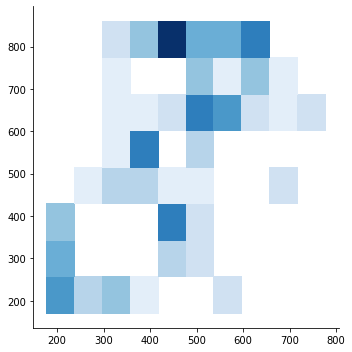

In [194]:
sns.displot(x = xplot, y = yplot, cmap='Blues');

In [238]:
xplot, yplot = [],[]
for x in [(314.608935546875, 771.197167968750), (315.279370117188, 779.052587890625), (516.455017089844, 691.629028320312), (546.929522705078, 663.504492187500), (624.636340332031, 775.079882812500), (600.076571655273, 778.067578125000), (495.014221191406, 605.920971679687), (205.941113281250, 343.649201679230), (484.893225097656, 521.209472656250), (399.350341796875, 447.788073730469), (405.038476562500, 813.064306640625), (484.401586914062, 528.477954101563), (578.740661621094, 783.844628906250), (589.126898193359, 772.491162109375), (593.747589111328, 776.306201171875), (397.329956054688, 592.116967773438), (493.008276367187, 697.710449218750), (502.393408203125, 706.601611328125), (409.968945312500, 598.606005859375), (479.084130859375, 615.145532226563), (546.737939453125, 605.850903320312), (410.274096679687, 838.357812500000), (418.383203125000, 833.656201171875)]:
    xplot.append(x[0])
    yplot.append(x[1])

In [239]:
import matplotlib.image as mpimg 
map_img = mpimg.imread(mapsPaths + "/" + temp + ".png") 
map_img

array([[[0.00784314, 0.00784314, 0.00784314, 1.        ],
        [0.00784314, 0.00784314, 0.00784314, 1.        ],
        [0.00784314, 0.00784314, 0.00784314, 1.        ],
        ...,
        [0.0627451 , 0.06666667, 0.0627451 , 1.        ],
        [0.0627451 , 0.06666667, 0.0627451 , 1.        ],
        [0.0627451 , 0.06666667, 0.0627451 , 1.        ]],

       [[0.00784314, 0.00784314, 0.00784314, 1.        ],
        [0.00784314, 0.00784314, 0.00784314, 1.        ],
        [0.00784314, 0.00784314, 0.00784314, 1.        ],
        ...,
        [0.0627451 , 0.06666667, 0.0627451 , 1.        ],
        [0.0627451 , 0.05490196, 0.0627451 , 1.        ],
        [0.0627451 , 0.06666667, 0.0627451 , 1.        ]],

       [[0.00784314, 0.00784314, 0.00784314, 1.        ],
        [0.00784314, 0.00784314, 0.00784314, 1.        ],
        [0.00784314, 0.00784314, 0.00784314, 1.        ],
        ...,
        [0.0627451 , 0.05490196, 0.0627451 , 1.        ],
        [0.0627451 , 0.054901

/home/nk095x/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Terrorists Attacking')

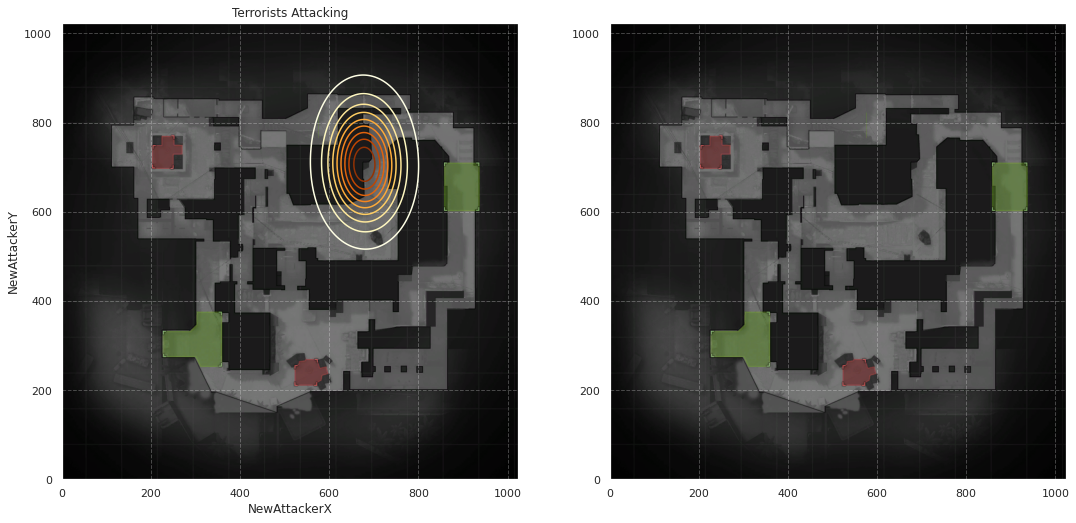

In [249]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,16))
ax1.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
ax2.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
ax1.imshow(bg2, zorder=0, extent=[0.0, 1024, 0., 1024])
ax2.imshow(bg2, zorder=0, extent=[0.0, 1024, 0., 1024])
plt.xlim(0,1024)
plt.ylim(0,1024)


plot_df = temp3
sns.kdeplot(plot_df['NewAttackerX'], plot_df['NewAttackerY'], cmap='YlOrBr', bw_adjust=5.5, ax=ax1)
ax1.set_title('Terrorists Attacking')

